<h1> NLP Lab 3 </h1>

****
NAME: SHREE PRASAD M   
ROLL NUMBER: CH.EN.U4AIE22050
****

In [1]:
import numpy as np
text = "My Name is TharunGK"
text_lower = text.lower()

tokens = text_lower.split()

unique_words = set(tokens)

sorted_words = sorted(unique_words)

word_to_index = {word: index for index, word in enumerate(sorted_words)}

one_hot_matrix = np.zeros((len(tokens), len(unique_words) ))

for i, token in enumerate(tokens):
    word_index = word_to_index[token]
    one_hot_matrix[i, word_index] = 1

print("Original Text:", text)
print("One-Hot Matrix:")
print(one_hot_matrix)

Original Text: My Name is TharunGK
One-Hot Matrix:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

sentence1 = "My Name is TharunGK"
sentence2 = "I am a student at AVV chennai"

sentencel = sentence1.lower()
sentence2 = sentence2. lower()

corpus = [sentence1, sentence2]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

print("Vocabulary:", vectorizer.get_feature_names_out())
print("Bag of Words Matrix:")
print(X.toarray())

Vocabulary: ['am' 'at' 'avv' 'chennai' 'is' 'my' 'name' 'student' 'tharungk']
Bag of Words Matrix:
[[0 0 0 0 1 1 1 0 1]
 [1 1 1 1 0 0 0 1 0]]


In [3]:
import pandas as pd
import numpy as np

corpus = ['data science is one of the most important fields of science',
          'this is one of the best data science courses',
          'data scientists analyze data']

words_set = set()

# Create a set of all unique words in the corpus
for doc in corpus:
    words = doc.split(' ')
    words_set = words_set.union(set(words))

print('Number of words in the corpus:', len(words_set))
print('The words in the corpus:\n', words_set)

n_docs = len(corpus)
n_words_set = len(words_set)

# Initialize the DataFrame with zero values
df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=list(words_set))

# Calculate Term Frequency (TF)
for i in range(n_docs):
    words = corpus[i].split(' ') 
    for w in words:
        df_tf.loc[i, w] = df_tf.loc[i, w] + (1 / len(words))  # Use loc to modify values

print("Term Frequency (TF):")
print(df_tf)

print("\nInverse Document Frequency (IDF):")
idf = {}

# Calculate Inverse Document Frequency (IDF)
for w in words_set:
    k = 0
    for i in range(n_docs):
        if w in corpus[i].split():
            k += 1

    if k > 0:  # To avoid division by zero
        idf[w] = np.log10(n_docs / k)
    else:
        idf[w] = 0  # Assigning 0 for words that don't appear in any document

    print(f'{w:>15}: {idf[w]:>10}')

# Calculate TF-IDF
df_tf_idf = df_tf.copy()

for w in words_set:
    for i in range(n_docs):
        df_tf_idf.loc[i, w] = df_tf.loc[i, w] * idf[w]  # Use loc for setting values

print("\nTF-IDF:")
print(df_tf_idf)

Number of words in the corpus: 14
The words in the corpus:
 {'science', 'scientists', 'this', 'fields', 'important', 'data', 'the', 'of', 'courses', 'one', 'most', 'is', 'best', 'analyze'}
Term Frequency (TF):
    science  scientists      this    fields  important      data       the  \
0  0.181818        0.00  0.000000  0.090909   0.090909  0.090909  0.090909   
1  0.111111        0.00  0.111111  0.000000   0.000000  0.111111  0.111111   
2  0.000000        0.25  0.000000  0.000000   0.000000  0.500000  0.000000   

         of   courses       one      most        is      best  analyze  
0  0.181818  0.000000  0.090909  0.090909  0.090909  0.000000     0.00  
1  0.111111  0.111111  0.111111  0.000000  0.111111  0.111111     0.00  
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000     0.25  

Inverse Document Frequency (IDF):
        science: 0.17609125905568124
     scientists: 0.47712125471966244
           this: 0.47712125471966244
         fields: 0.47712125471966244
  

In [4]:
import gensim
from gensim.models import KeyedVectors

import gensim.downloader as api

# Download the pre-trained Word2Vec model from Google (takes some time)
# This downloads a large file, so be patient.
word2vec_model_path = api.load("glove-wiki-gigaword-50", return_path=True)

# Load the Word2Vec model using gensim
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_model_path, binary=False)

# Example: Get the word embedding for the word "king"
word_embedding = word2vec_model["king"]

# Print the dimensionality of the word embedding
print("Dimensionality of word embedding:", len(word_embedding))

# Example: Get the most similar words to "king"
similar_words = word2vec_model.most_similar("king")
print("Words most similar to 'king':", similar_words)

# Example: Calculate the similarity between two words
similarity_score = word2vec_model.similarity("king", "queen")
print("Similarity between 'king' and 'queen':", similarity_score)

# Example: Calculate the vector representing the combination of words "king" and "man" minus "woman"
result_vector = word2vec_model.most_similar(positive=["king", "man"], negative=["woman"], topn=1)
print("Vector representation of 'king - man + woman':", result_vector)

[==================================================] 100.0% 66.0/66.0MB downloaded
Dimensionality of word embedding: 50
Words most similar to 'king': [('prince', 0.8236179351806641), ('queen', 0.7839043140411377), ('ii', 0.7746230363845825), ('emperor', 0.7736247777938843), ('son', 0.766719400882721), ('uncle', 0.7627150416374207), ('kingdom', 0.7542160749435425), ('throne', 0.7539913654327393), ('brother', 0.7492411136627197), ('ruler', 0.7434253692626953)]
Similarity between 'king' and 'queen': 0.7839043
Vector representation of 'king - man + woman': [('ruler', 0.7395833134651184)]


In [7]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 15.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [8]:
import spacy

# Load the pre-trained GloVe model
nlp = spacy.load("en_core_web_md")

# Test sentences
sentencel = "I love natural language processing."
sentence2 = "Glove is a powerful word embedding technique."

# Tokenize and get word embeddings for each sentence
doc1 = nlp(sentence1)
doc2 = nlp(sentence2)

# Print word embeddings for each word in the sentences
print("Word embeddings for sentence 1:")
for token in doc1:
    print(f"{token.text}: {token.vector}")

print("\nWord embeddings for sentence 2:")
for token in doc2:
    print(f"{token.text}: {token.vector}")

Word embeddings for sentence 1:
My: [-7.3351e-01  4.1392e-01 -4.4250e-01 -2.9127e-01 -9.6179e-02  9.7562e-02
  1.3151e-01 -5.1825e-01  1.0671e-01  2.4144e+00 -2.6212e-01 -1.2881e-01
 -1.0052e-01  1.2833e-01 -4.5271e-01 -1.4928e-01 -1.5026e-01  6.6120e-01
 -1.8984e-01  9.3389e-02 -1.9194e-02 -9.1885e-02  2.8984e-02 -2.3942e-01
  6.4044e-02 -1.5922e-01 -3.0426e-01 -2.2637e-01  3.8600e-02 -2.6689e-01
 -9.5402e-02  7.9951e-02 -1.9862e-01 -1.2678e-01  2.3640e-01  6.6308e-01
  1.1111e-01  2.9372e-02 -4.5536e-02 -2.5312e-02 -2.6607e-02 -1.8607e-01
 -2.2338e-01  1.0604e-01  1.1929e-01  5.2028e-02 -1.0039e-01  1.8268e-01
 -3.4591e-01 -1.6101e-01 -1.8500e-01  5.0789e-01  2.2425e-01  1.2521e-01
  1.5326e-02  7.9736e-02 -1.5052e-01 -1.2649e-01  2.0725e-01 -8.7926e-02
 -7.4992e-02 -2.9551e-01  6.6271e-02  3.5549e-01  4.9308e-01 -1.8082e-01
 -2.7133e-02  8.2868e-03  1.0039e-01 -2.7597e-02  4.5138e-01  2.4734e-01
  2.4167e-01  1.3384e-02  9.5598e-02  3.7121e-01 -7.7239e-02 -2.8171e-01
 -1.4073e-01  4

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Define a list of strings as your sample text
x = ['text', 'the', 'leader', 'prime', 'natural', 'language' ]

# Create the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

# Number of unique words in the dictionary
print("Number of unique words in the dictionary =", len(tokenizer.word_index))
print("Dictionary is =", tokenizer.word_index)

2024-12-20 09:28:50.839009: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-20 09:28:51.369135: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-20 09:28:51.543854: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734686931.796741    7493 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734686931.843437    7493 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-20 09:28:52.351332: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Number of unique words in the dictionary = 6
Dictionary is = {'text': 1, 'the': 2, 'leader': 3, 'prime': 4, 'natural': 5, 'language': 6}


In [ ]:
def embedding_for_vocab(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding 1 because of reserved 0 index
    embedding_matrix_vocab = np.zeros((vocab_size, embedding_dim))

    # Open the file containing the word vectors
    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix_vocab

# Define the embedding dimension
embedding_dim = 100

# Generate the embedding matrix for the given GloVe file
embedding_matrix_vocab = embedding_for_vocab('glove.txt', tokenizer.word_index, embedding_dim)

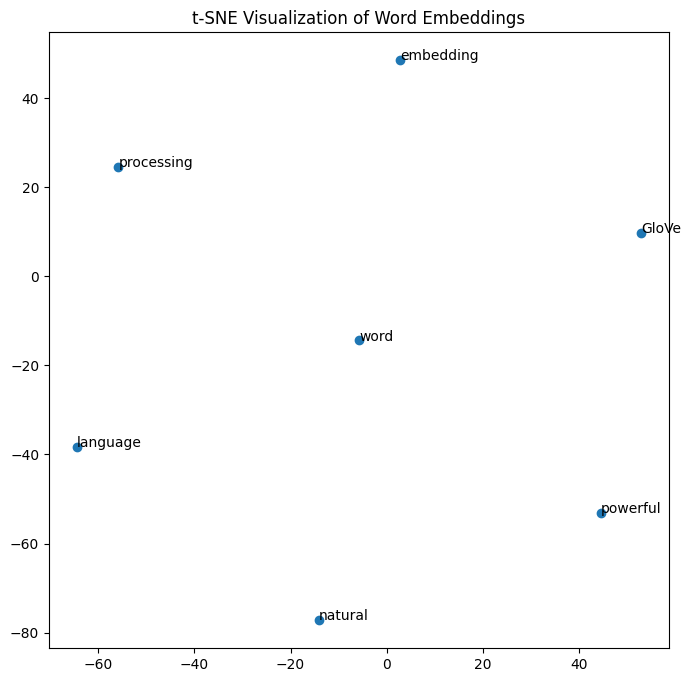

In [13]:
import spacy
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Load the pre-trained GloVe model
nlp = spacy.load("en_core_web_md")

# List of words for visualization
words_to_visualize = ["natural", "language", "processing", "GloVe", "powerful", "word", "embedding"]

# Get word embeddings for the selected words
word_vectors = [nlp(word).vector for word in words_to_visualize]

# Convert word_vectors to a NumPy array
word_vectors_array = np.array(word_vectors)

# Ensure perplexity is Less than the number of samples
perplexity = min(30, len(word_vectors_array) - 1)

# Apply t-SNE to reduce dimensionality to 20
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors_array)

# Plot the words in 2D space
plt.figure(figsize=(8, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

# Annotate each point with the corresponding word
for i, word in enumerate(words_to_visualize):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.title("t-SNE Visualization of Word Embeddings")
plt.show()

### Fast Text

In [30]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [28]:
intro_doc = """N early ten years had passed since the Dursleys had woken up to find their
nephew on the front step, but Privet Drive had hardly changed at all. The sun
rose on the same tidy front gardens and lit up the brass number four on the
Dursleys front door; it crept into their living room, which was almost exactly
the same as it had been on the night when Mr. Dursley had seen that fateful news
report about the owls. Only the photographs on the mantelpiece really showed
how much time had passed. Ten years ago, there had been lots of pictures of
what looked like a large pink beach ball wearing different-colored bonnets —
but Dudley Dursley was no longer a baby, and now the photographs showed a
large blond boy riding his first bicycle, on a carousel at the fair, playing a
computer game with his father, being hugged and kissed by his mother. The
room held no sign at all that another boy lived in the house, too.
Yet Harry Potter was still there, asleep at the moment, but not for long.
His Aunt Petunia was awake and it was her shrill voice that made the first noise
of the day.""".splitlines()

from nltk.tokenize import word_tokenize
from gensim.models import FastText



In [31]:
tokens_sen = [word_tokenize(a.lower()) for a in intro_doc]

# print(tokens_sen)


model = FastText(
    sentences=tokens_sen,
    vector_size=128,
    window=4,
    min_count=2,
    workers=4,
    epochs=10,
    seed=42,
    sg=1

)

ftext = model.wv

print(f"number of unique wordw : {len(ftext.index_to_key)}")
print(f"Vector Size {ftext.vector_size}")
print(f"fastext {ftext["fasttext"][:10]}..")
print(f"Similar to 'niece' : {ftext.similar_by_word("niece", topn=5)}")

number of unique wordw : 33
Vector Size 128
fastext [-6.1595975e-04  4.1009593e-04  9.9575933e-05  2.3051300e-03
  7.6282356e-04  5.5791030e-04 -7.6918374e-04 -6.7022134e-04
  6.9766771e-04 -7.1074656e-04]..
Similar to 'niece' : [('a', 0.21517634391784668), ('room', 0.09632600843906403), ('ten', 0.08491074293851852), ('dursleys', 0.06832265108823776), ('there', 0.05814426392316818)]
